In [166]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
import math

In [42]:
h = open('ratings_data.tsv', 'r')
f = h.read()
f = ''.join(f.split('\x00'))

In [43]:
fi = open('ratings_data.tsv', 'w')
fi.write(f)
fi.close()

In [111]:
data = pd.read_csv('ratings_data.tsv', sep='\t', parse_dates=[1])

In [112]:
d = data.groupby(['ga:dimension104', 'ga:date']).sum()
del d['ga:transactionsPerSession']

In [113]:
tra = d.copy()
del tra['ga:transactionRevenue']
rev = d.copy()
del rev['ga:transactions']

In [114]:
indices = []
for idx, row in rev.iterrows():
    if idx[0] in indices:
        continue
    indices.append(idx[0])

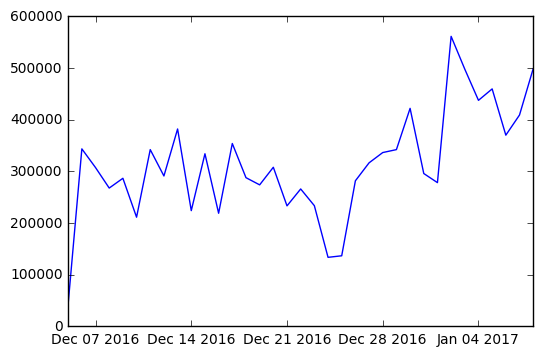

In [115]:
plt.plot(rev.ix[4.5])

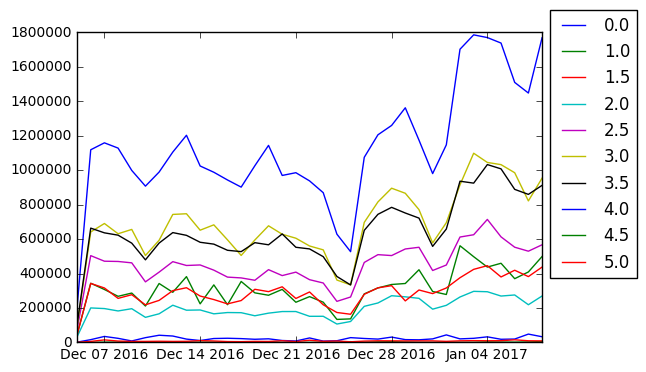

In [116]:
for idx in indices:
    plt.plot(rev.ix[idx], label=idx)
plt.legend(indices, loc=2, bbox_to_anchor=(1, 1.1))

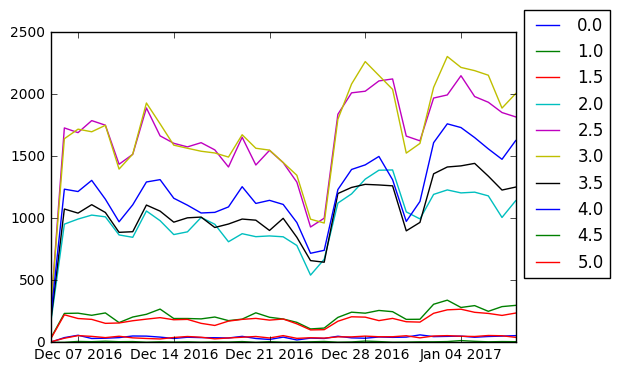

In [117]:
for idx in indices:
    plt.plot(tra.ix[idx], label=idx)
plt.legend(indices, loc=2, bbox_to_anchor=(1, 1.1))

In [118]:
avg = d['ga:transactionRevenue'] / d['ga:transactions']

In [119]:
avg.fillna(0, inplace=True)

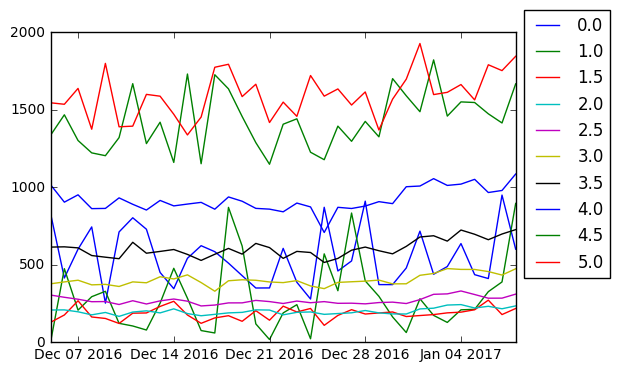

In [120]:
for idx in indices:
    plt.plot(avg[idx], label=idx)
plt.legend(indices, loc=2, bbox_to_anchor=(1, 1.1))

In [181]:
def test_arima(orders, x):
    order = orders[:3]
    seasonal_order = orders[3:]
    seasonal_order = np.insert(seasonal_order, 3, 7)
    try:
        fit = sm.tsa.statespace.SARIMAX(x, lags=2, trend='n', method='css', order=order, seasonal_order=seasonal_order).fit()
        if math.isnan(fit.bic):
            return float('inf')
        return fit.bic
    except Exception as err:
        return float('inf')

In [186]:
from scipy.optimize import brute
grid = (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
res = brute(test_arima, grid, args=(rev.ix[3.0],), finish=None, full_output=True)

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning

In [187]:
res

(array([ 2.,  2.,  0.,  2.,  2.,  0.]),
 524.4225493554693,
 array([[[[[[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]]],
 
 
 
          [[[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
 

In [188]:
fit = sm.tsa.statespace.SARIMAX(rev.ix[3.0], trend='n', order=[0, 2, 0], seasonal_order=[2, 2, 0, 7]).fit()

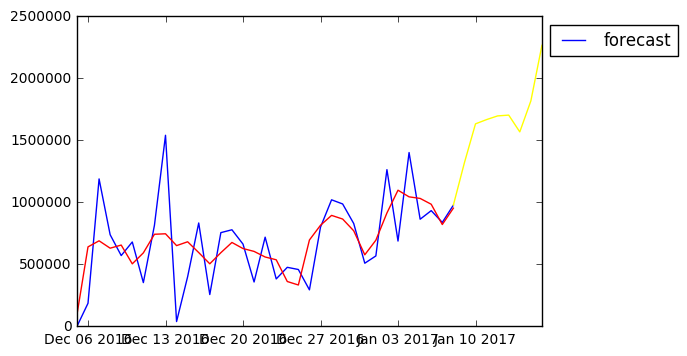

In [189]:
fcast = fit.predict(start='2017-01-08', end='2017-01-16', dynamic=True)
plt.plot(fit.fittedvalues, label='forecast')
plt.plot(rev.ix[3.0], color='red')
plt.plot(fcast, color='yellow')
plt.legend(loc=2, bbox_to_anchor=(1,1))

In [175]:
print fit.summary()

                                 Statespace Model Results                                
Dep. Variable:             ga:transactionRevenue   No. Observations:                   35
Model:             SARIMAX(0, 2, 1)x(0, 2, 0, 7)   Log Likelihood                -267.495
Date:                           Mon, 09 Jan 2017   AIC                            538.991
Time:                                   11:26:32   BIC                            542.101
Sample:                               12-05-2016   HQIC                           540.064
                                    - 01-08-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9692      0.366     -2.647      0.008      -1.687      -0.252
sigma2      1.438e+11   3.03e-13   4.74e+23